In [1]:
from dask.distributed import LocalCluster, Client
cluster = LocalCluster()
client = Client(cluster)
client

import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
import cmocean.cm as cmo
from xmitgcm import open_mdsdataset


In [2]:
filename_state = 'diag_state'
filename_surf = 'diag_surf'

# data_dir = '/data/SO3/edavenport/tpose6/nov2012/run_iter0/'
data_dir = '/data/SO3/edavenport/tpose6/sep2012/velocity_withhold/run_iter14/'
grid_dir = '/data/SO6/TPOSE_diags/tpose6/grid_6/'

num_diags = 122 #
itPerFile = 72 # 1 day
intervals = range(itPerFile,itPerFile*num_diags+1,itPerFile)

prefix = [filename_state, filename_surf]
ds = open_mdsdataset(data_dir=data_dir,grid_dir=grid_dir,iters=intervals,prefix=prefix,ref_date='2012-09-01',delta_t=1200.,ignore_unknown_vars=True)

ds['XC'] = ds.XC.astype(float)
ds['YC'] = ds.YC.astype(float)
ds['Z'] = ds.Z.astype(float)
ds['XG'] = ds.XG.astype(float)
ds['YG'] = ds.YG.astype(float)
ds['Zl'] = ds.Zl.astype(float)

# data_dir = '/data/SO3/edavenport/tpose6/nov2012/run_iter0_noVelAssimIC/'
data_dir = '/data/SO3/edavenport/tpose6/sep2012/velocity_assim/run_iter22/'
grid_dir = '/data/SO6/TPOSE_diags/tpose6/grid_6/'

num_diags = 122 #
itPerFile = 72 # 1 day
intervals = range(itPerFile,itPerFile*num_diags+1,itPerFile)

prefix = [filename_state, filename_surf]
ds_vel = open_mdsdataset(data_dir=data_dir,grid_dir=grid_dir,iters=intervals,prefix=prefix,ref_date='2012-09-01',delta_t=1200.,ignore_unknown_vars=True)

ds_vel['XC'] = ds.XC.astype(float)
ds_vel['YC'] = ds.YC.astype(float)
ds_vel['Z'] = ds.Z.astype(float)
ds_vel['XG'] = ds.XG.astype(float)
ds_vel['YG'] = ds.YG.astype(float)
ds_vel['Zl'] = ds.Zl.astype(float)

# data_dir = '/data/SO3/edavenport/tpose6/nov2012/run_iter0_noVelAssimIC/'
data_dir = '/data/SO3/edavenport/tpose6/sep2012/velocity_assim/run_iter0/'
grid_dir = '/data/SO6/TPOSE_diags/tpose6/grid_6/'

num_diags = 122 #
itPerFile = 72 # 1 day
intervals = range(itPerFile,itPerFile*num_diags+1,itPerFile)

prefix = [filename_state, filename_surf]
ds_noTAO = open_mdsdataset(data_dir=data_dir,grid_dir=grid_dir,iters=intervals,prefix=prefix,ref_date='2012-09-01',delta_t=1200.,ignore_unknown_vars=True)

ds_noTAO['XC'] = ds.XC.astype(float)
ds_noTAO['YC'] = ds.YC.astype(float)
ds_noTAO['Z'] = ds.Z.astype(float)
ds_noTAO['XG'] = ds.XG.astype(float)
ds_noTAO['YG'] = ds.YG.astype(float)
ds_noTAO['Zl'] = ds.Zl.astype(float)

In [3]:
folder_name = '/home/edavenport/analysis/mitgcm-equatorial-waves/hovmoller/'

In [4]:
from scipy import signal
import xarray as xr
latMin = -0.1
latMax = 0.1

In [57]:
latMin = -0.1
latMax = 0.1
depth = -200.0

UVEL = ds.UVEL.sel(YC=slice(latMin,latMax),XG=slice(180,250)).sel(Z=depth,method='nearest').mean(dim='YC').squeeze().compute()
UVEL_vel = ds_vel.UVEL.sel(YC=slice(latMin,latMax),XG=slice(180,250)).sel(Z=depth,method='nearest').mean(dim='YC').squeeze().compute()
UVEL_noTAO = ds_noTAO.UVEL.sel(YC=slice(latMin,latMax),XG=slice(180,250)).sel(Z=depth,method='nearest').mean(dim='YC').squeeze().compute()

uvel = signal.detrend(UVEL, axis=0)
uvel = uvel - uvel.mean()

# Build the DataArray with appropriate coordinates
uvel = xr.DataArray(
    uvel,
    dims=('time', 'XG'),
    coords={'time': UVEL.time, 'XG': UVEL.XG},
    name='uvel anomaly'
)

uvel_vel = signal.detrend(UVEL_vel, axis=0)
uvel_vel = uvel_vel - uvel_vel.mean()

# Build the DataArray with appropriate coordinates
uvel_vel = xr.DataArray(
    uvel_vel,
    dims=('time', 'XG'),
    coords={'time': UVEL.time, 'XG': UVEL.XG},
    name='uvel anomaly'
)

uvel_noTAO = signal.detrend(UVEL_noTAO, axis=0)
uvel_vel = uvel_vel - uvel_vel.mean()

# Build the DataArray with appropriate coordinates
uvel_noTAO = xr.DataArray(
    uvel_noTAO,
    dims=('time', 'XG'),
    coords={'time': UVEL.time, 'XG': UVEL.XG},
    name='uvel anomaly'
)


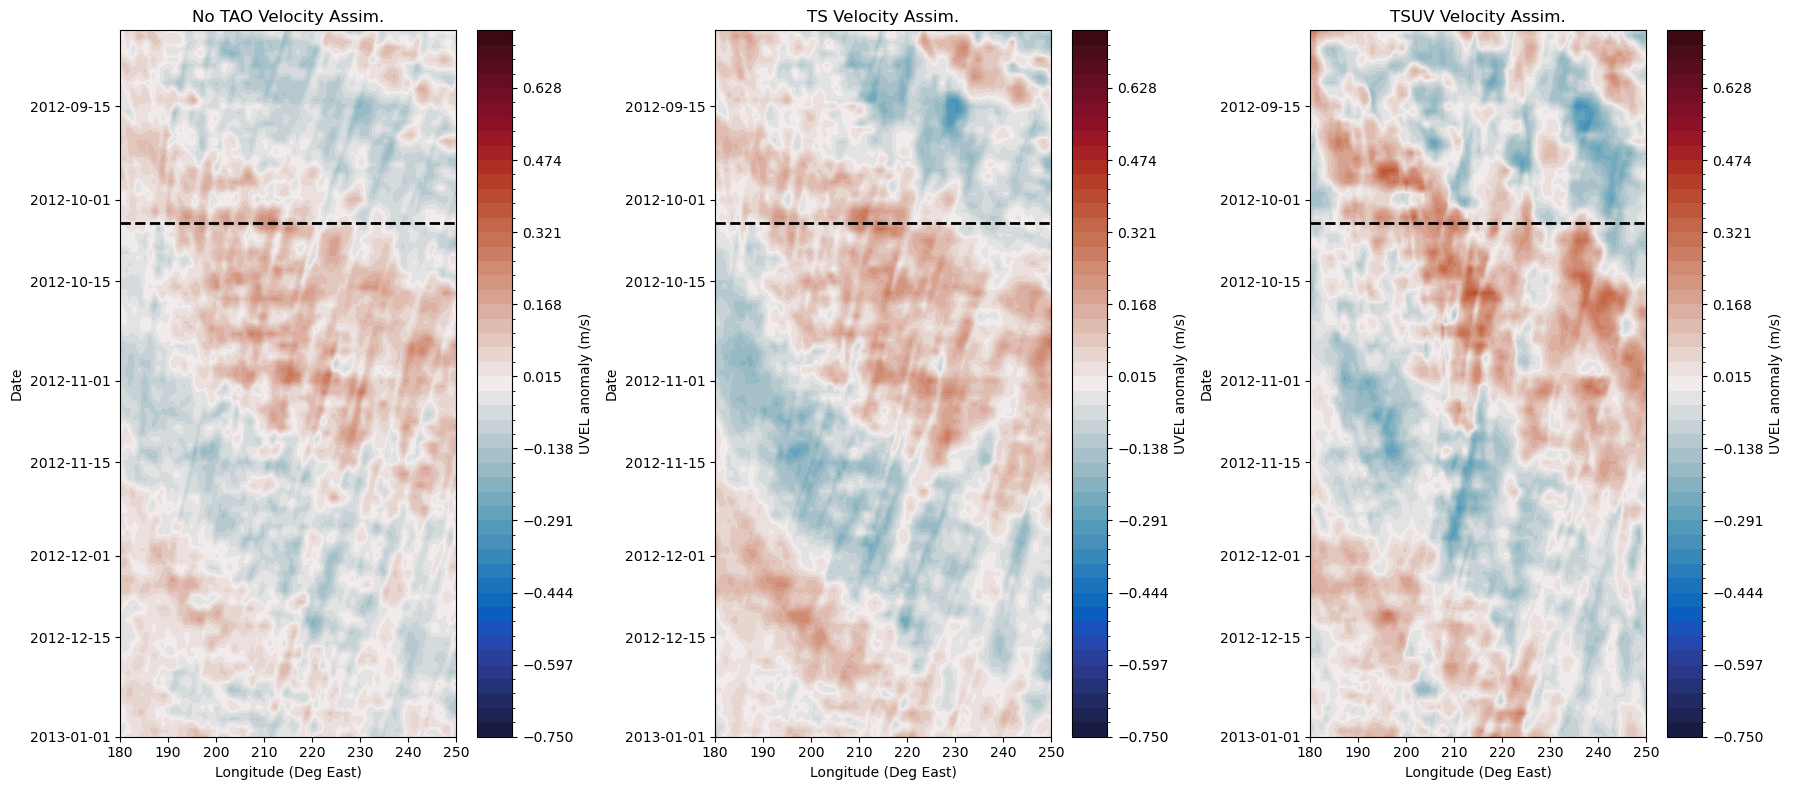

In [58]:
fig, ax = plt.subplots(figsize=(18,8), ncols=3)
vmin = -0.75
vmax = 0.75
levels = np.linspace(vmin,vmax,50)
uvel_noTAO.plot.contourf(levels=levels,vmin=vmin,vmax=vmax,ax=ax[0],x='XG',cmap=cmo.balance,cbar_kwargs={'label':'UVEL anomaly (m/s)'})
ax[0].axhline(y=np.datetime64('2012-10-05'),color='k',linestyle='--',linewidth=2)
ax[0].set_xlabel('Longitude (Deg East)')
ax[0].set_ylabel('Date')
ax[0].set_title('No TAO Velocity Assim.')
ax[0].invert_yaxis()

uvel.plot.contourf(levels=levels,vmin=vmin,vmax=vmax,ax=ax[1],x='XG',cmap=cmo.balance,cbar_kwargs={'label':'UVEL anomaly (m/s)'})
ax[1].axhline(y=np.datetime64('2012-10-05'),color='k',linestyle='--',linewidth=2)
ax[1].set_xlabel('Longitude (Deg East)')
ax[1].set_ylabel('Date')
ax[1].set_title('TS Velocity Assim.')
ax[1].invert_yaxis()

uvel_vel.plot.contourf(levels=levels,vmin=vmin,vmax=vmax,ax=ax[2],x='XG',cmap=cmo.balance,cbar_kwargs={'label':'UVEL anomaly (m/s)'})
ax[2].axhline(y=np.datetime64('2012-10-05'),color='k',linestyle='--',linewidth=2)
ax[2].set_xlabel('Longitude (Deg East)')
ax[2].set_ylabel('Date')
ax[2].set_title('TSUV Velocity Assim.')
ax[2].invert_yaxis()

plt.tight_layout()
image_str = 'hovmoller_uvel_'+ str(abs(int(depth))) + 'meters.png'
plt.savefig(folder_name+image_str,format='png')

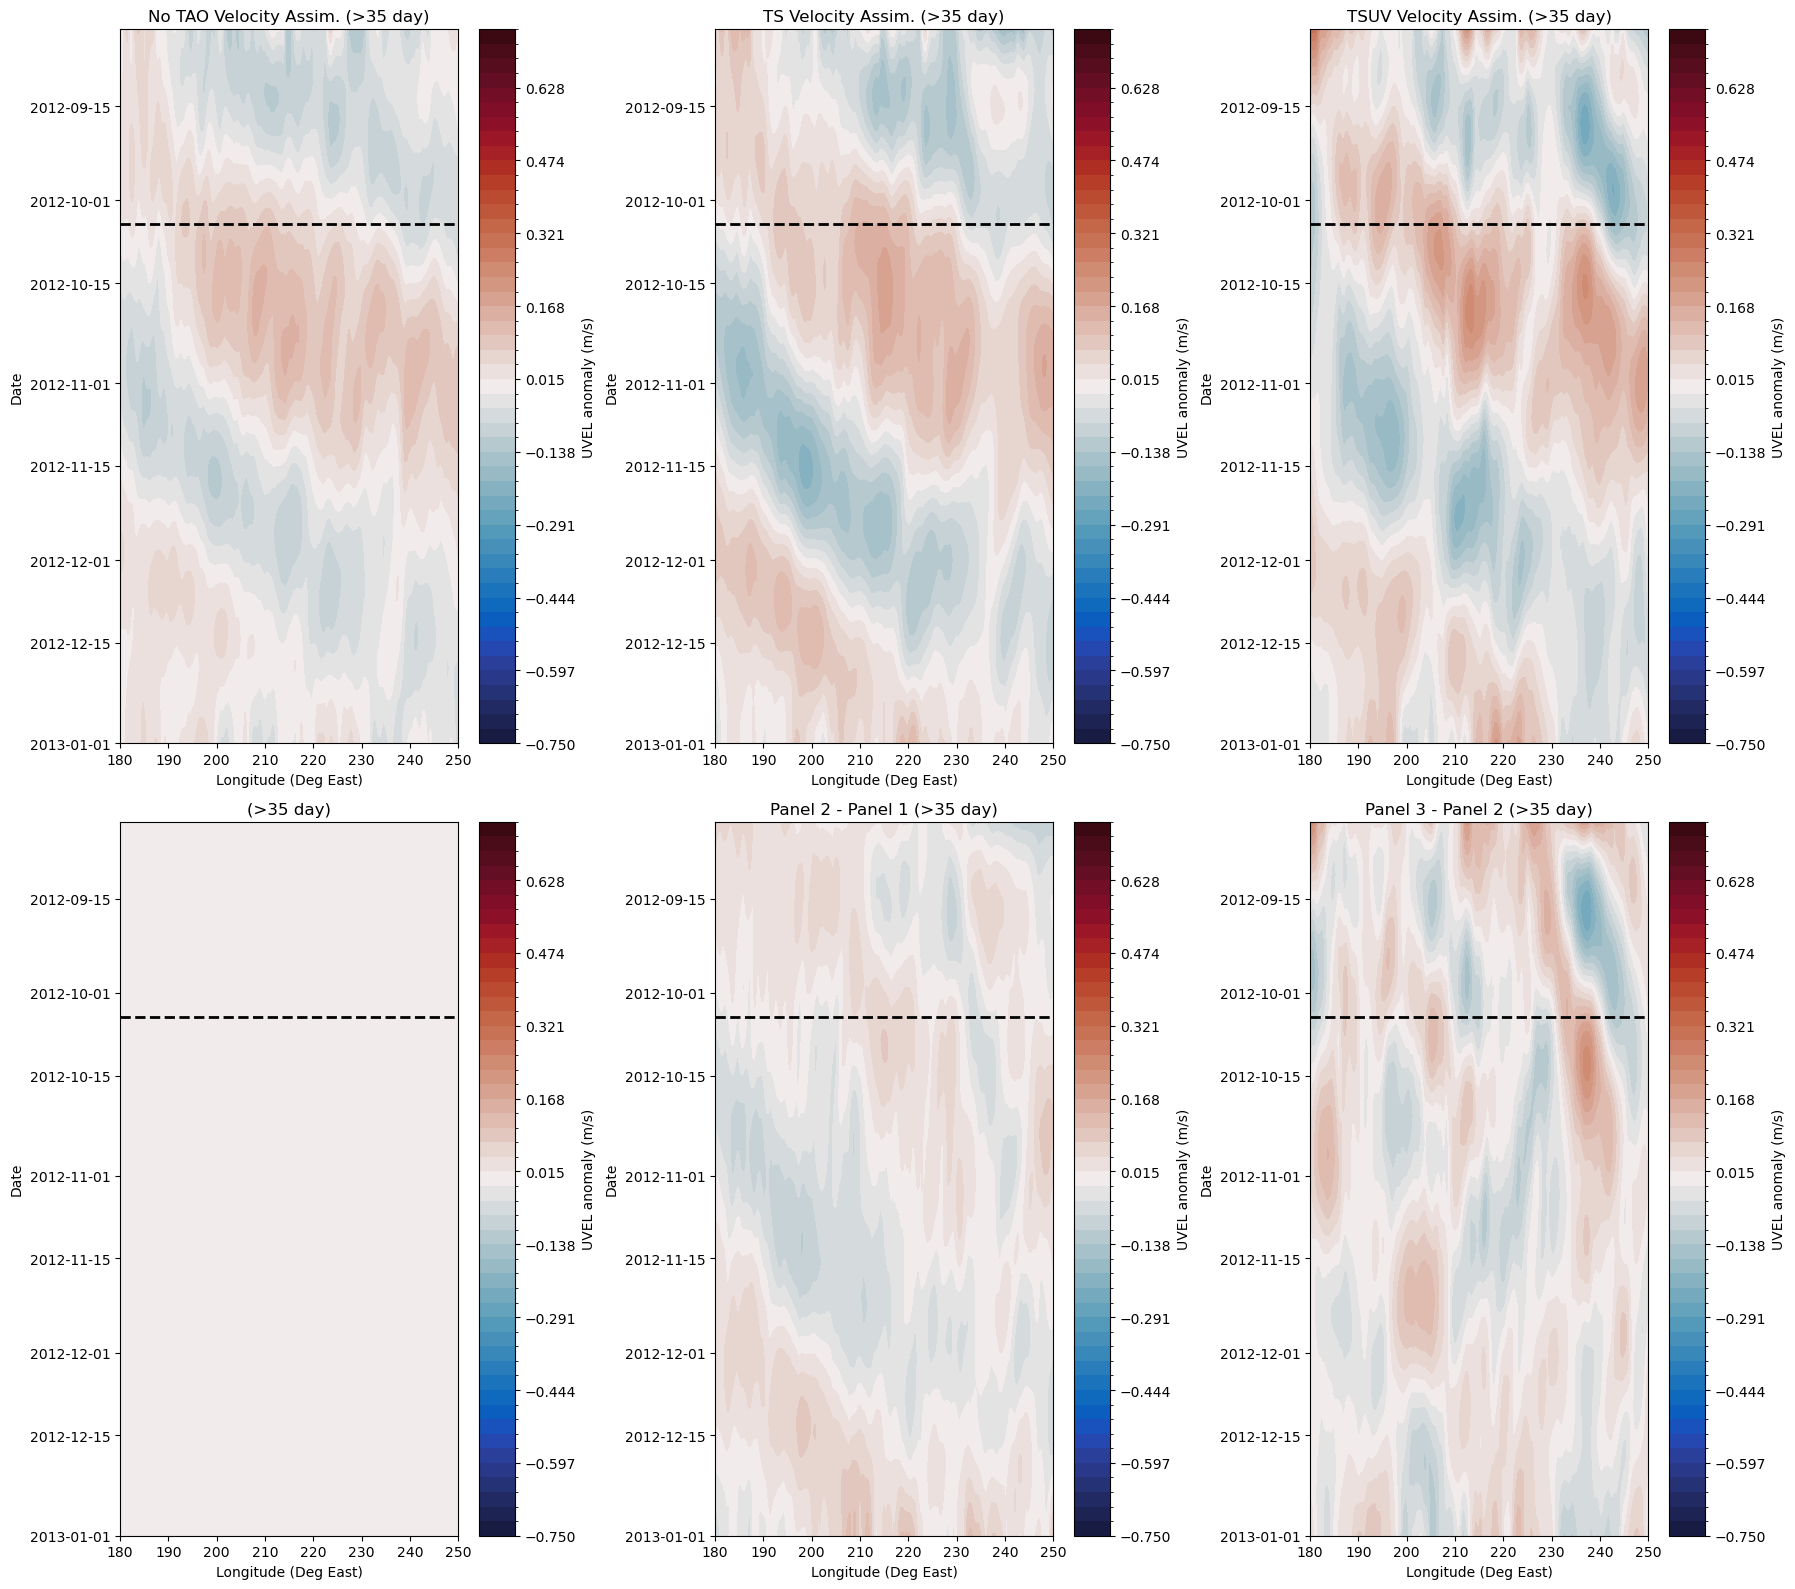

In [59]:
# filtering out high frequency changes
fs = 1/86400 # sampling rate is 1 day (86400 seconds per day)
highF = (1/35)*fs #  (1 cycle /35 days) * (1 day/86400 second)
cutoff = np.array(highF)
order = 4
sos = signal.butter(order, cutoff, 'lowpass', fs=fs, output='sos')

uvel_filt = signal.sosfiltfilt(sos, uvel, axis=0)
uvel_filt_vel = signal.sosfiltfilt(sos, uvel_vel, axis=0)
uvel_filt_noTAO = signal.sosfiltfilt(sos, uvel_noTAO, axis=0)

uvel_filt = xr.DataArray(
    uvel_filt,
    dims=('time', 'XG'),
    coords={'time': UVEL.time, 'XG': UVEL.XG},
    name='Z20'
)

uvel_filt_vel = xr.DataArray(
    uvel_filt_vel,
    dims=('time', 'XG'),
    coords={'time': UVEL_vel.time, 'XG': UVEL_vel.XG},
    name='Z20'
)

uvel_filt_noTAO = xr.DataArray(
    uvel_filt_noTAO,
    dims=('time', 'XG'),
    coords={'time': UVEL_noTAO.time, 'XG': UVEL_noTAO.XG},
    name='Z20'
)

fig, ax = plt.subplots(figsize=(18,16), ncols=3,nrows=2)

vmin = -0.75
vmax = 0.75
levels = np.linspace(vmin,vmax,50)
uvel_filt_noTAO.plot.contourf(levels=levels,vmin=vmin,vmax=vmax,ax=ax[0,0],x='XG',cmap=cmo.balance,cbar_kwargs={'label':'UVEL anomaly (m/s)'})
ax[0,0].axhline(y=np.datetime64('2012-10-05'),color='k',linestyle='--',linewidth=2)
ax[0,0].set_xlabel('Longitude (Deg East)')
ax[0,0].set_ylabel('Date')
ax[0,0].set_title('No TAO Velocity Assim. (>35 day)')
ax[0,0].invert_yaxis()

uvel_filt.plot.contourf(levels=levels,vmin=vmin,vmax=vmax,ax=ax[0,1],x='XG',cmap=cmo.balance,cbar_kwargs={'label':'UVEL anomaly (m/s)'})
ax[0,1].axhline(y=np.datetime64('2012-10-05'),color='k',linestyle='--',linewidth=2)
ax[0,1].set_xlabel('Longitude (Deg East)')
ax[0,1].set_ylabel('Date')
ax[0,1].set_title('TS Velocity Assim. (>35 day)')
ax[0,1].invert_yaxis()

uvel_filt_vel.plot.contourf(levels=levels,vmin=vmin,vmax=vmax,ax=ax[0,2],x='XG',cmap=cmo.balance,cbar_kwargs={'label':'UVEL anomaly (m/s)'})
ax[0,2].axhline(y=np.datetime64('2012-10-05'),color='k',linestyle='--',linewidth=2)
ax[0,2].set_xlabel('Longitude (Deg East)')
ax[0,2].set_ylabel('Date')
ax[0,2].set_title('TSUV Velocity Assim. (>35 day)')
ax[0,2].invert_yaxis()

(uvel_filt_noTAO - uvel_filt_noTAO).plot.contourf(levels=levels,vmin=vmin,vmax=vmax,ax=ax[1,0],x='XG',cmap=cmo.balance,cbar_kwargs={'label':'UVEL anomaly (m/s)'})
ax[1,0].axhline(y=np.datetime64('2012-10-05'),color='k',linestyle='--',linewidth=2)
ax[1,0].set_xlabel('Longitude (Deg East)')
ax[1,0].set_ylabel('Date')
ax[1,0].set_title('(>35 day)')
ax[1,0].invert_yaxis()

(uvel_filt - uvel_filt_noTAO).plot.contourf(levels=levels,vmin=vmin,vmax=vmax,ax=ax[1,1],x='XG',cmap=cmo.balance,cbar_kwargs={'label':'UVEL anomaly (m/s)'})
ax[1,1].axhline(y=np.datetime64('2012-10-05'),color='k',linestyle='--',linewidth=2)
ax[1,1].set_xlabel('Longitude (Deg East)')
ax[1,1].set_ylabel('Date')
ax[1,1].set_title('Panel 2 - Panel 1 (>35 day)')
ax[1,1].invert_yaxis()

(uvel_filt_vel - uvel_filt).plot.contourf(levels=levels,vmin=vmin,vmax=vmax,ax=ax[1,2],x='XG',cmap=cmo.balance,cbar_kwargs={'label':'UVEL anomaly (m/s)'})
ax[1,2].axhline(y=np.datetime64('2012-10-05'),color='k',linestyle='--',linewidth=2)
ax[1,2].set_xlabel('Longitude (Deg East)')
ax[1,2].set_ylabel('Date')
ax[1,2].set_title('Panel 3 - Panel 2 (>35 day)')
ax[1,2].invert_yaxis()

plt.tight_layout()
image_str = 'hovmoller_uvel_lowPass_'+ str(abs(int(depth))) + 'meters.png'
plt.savefig(folder_name+image_str,format='png')


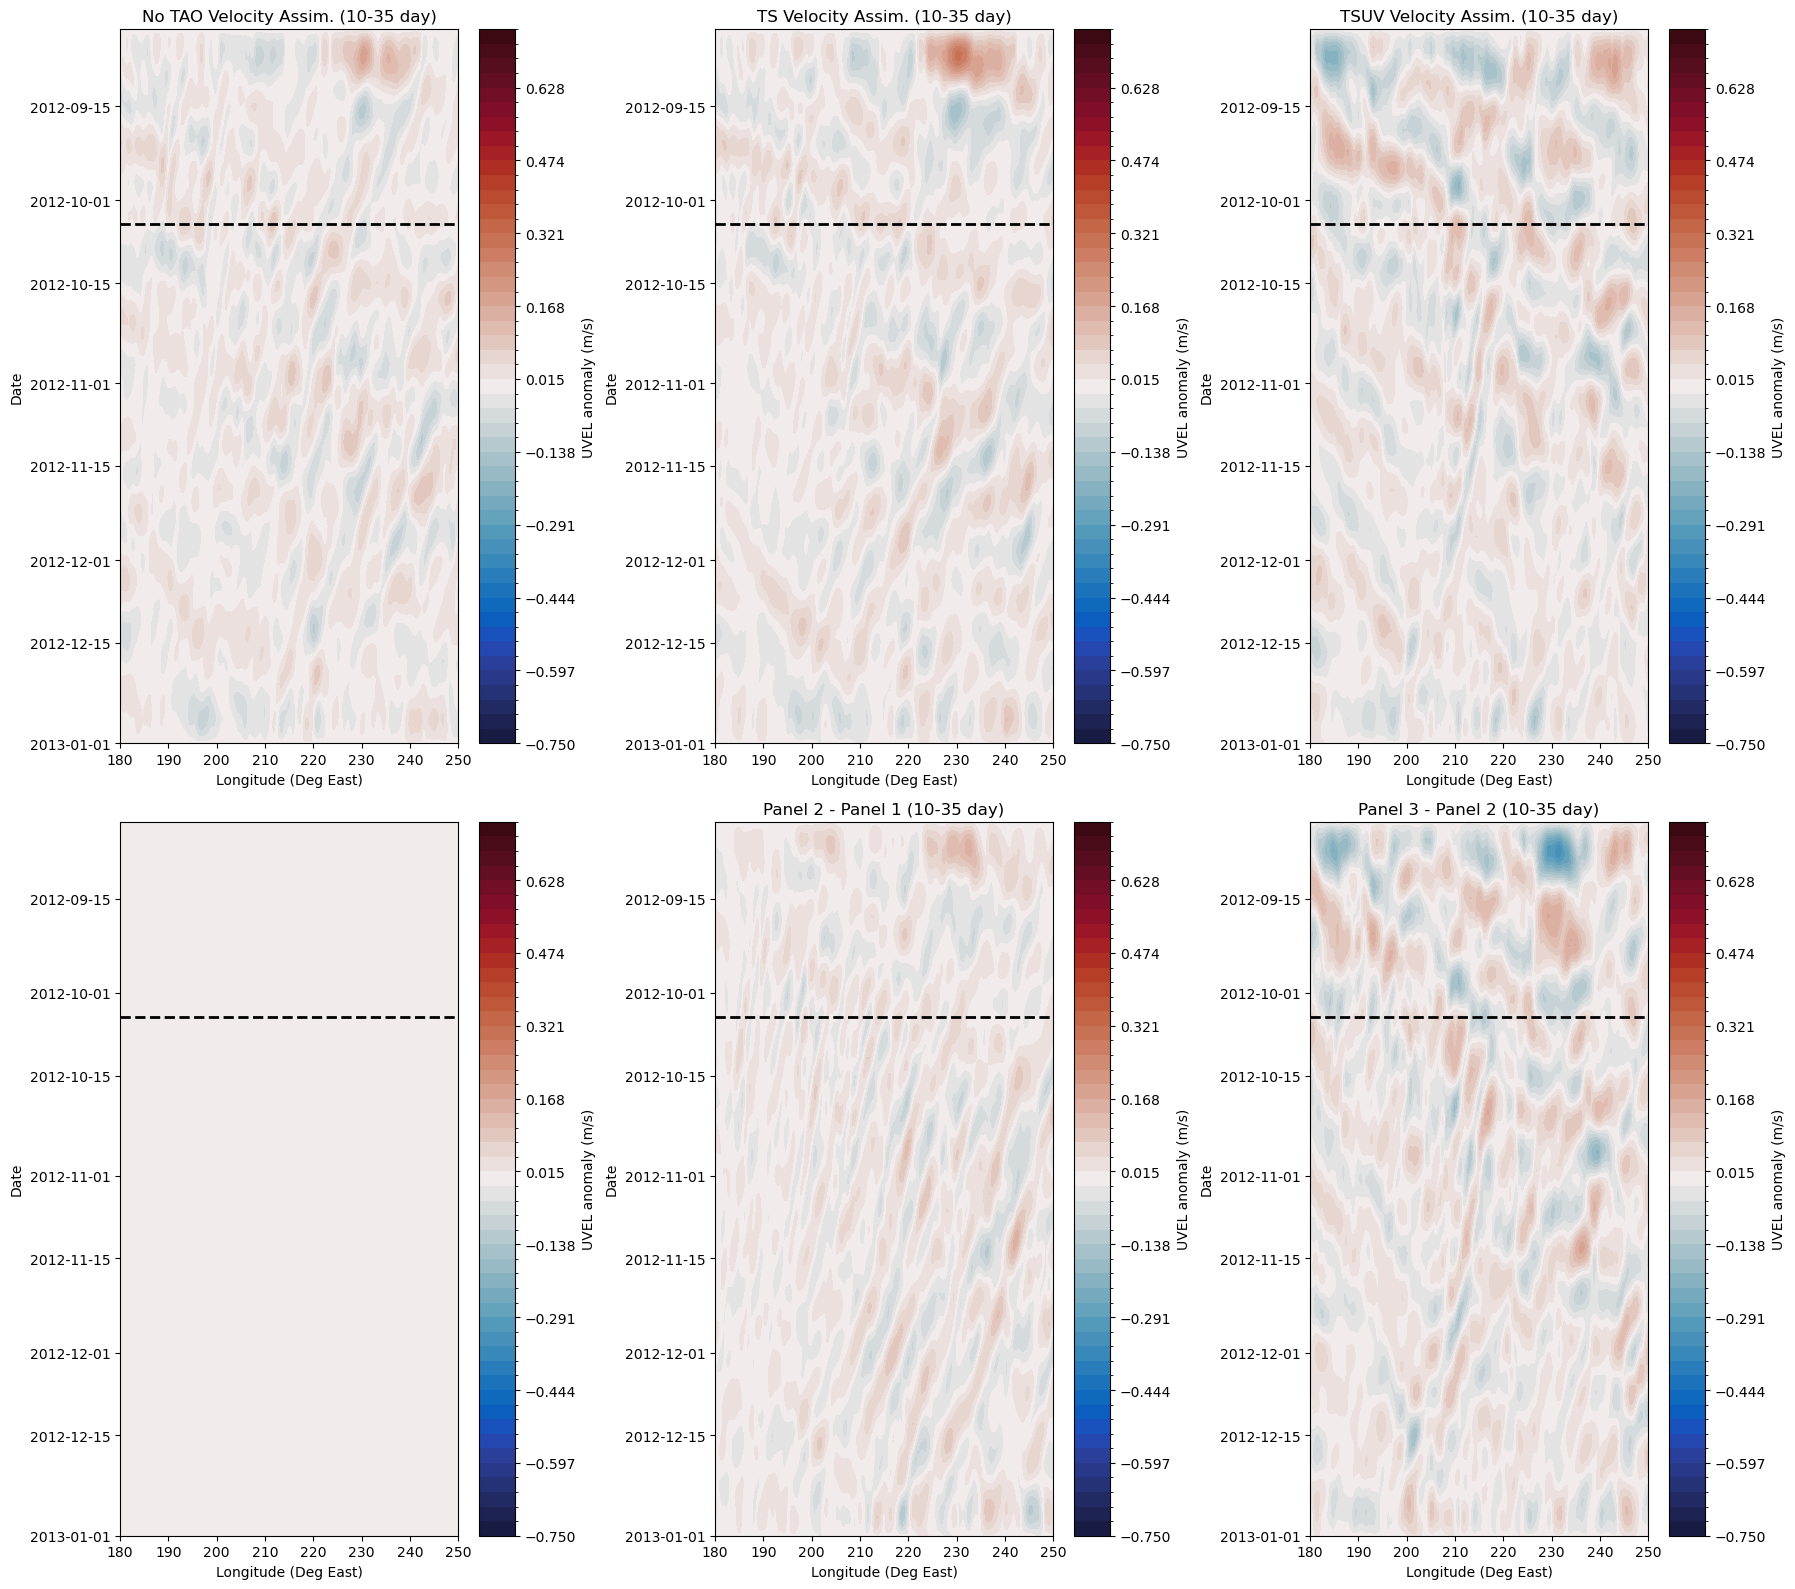

In [60]:
fs = 1/86400 # sampling rate is 1 day (86400 seconds per day)
lowF = (1/35)*fs #  (1 cycle /35 days) * (1 day/86400 second)
highF = (1/10)*fs #  (1 cycle /35 days) * (1 day/86400 second)
cutoff = np.array(highF)
order = 4
sos = signal.butter(order, [lowF, highF], 'bandpass', fs=fs, output='sos')

uvel_filt = signal.sosfiltfilt(sos, uvel, axis=0)
uvel_filt_vel = signal.sosfiltfilt(sos, uvel_vel, axis=0)
uvel_filt_noTAO = signal.sosfiltfilt(sos, uvel_noTAO, axis=0)

uvel_filt = xr.DataArray(
    uvel_filt,
    dims=('time', 'XG'),
    coords={'time': UVEL.time, 'XG': UVEL.XG},
    name='Z20'
)

uvel_filt_vel = xr.DataArray(
    uvel_filt_vel,
    dims=('time', 'XG'),
    coords={'time': UVEL_vel.time, 'XG': UVEL_vel.XG},
    name='Z20'
)

uvel_filt_noTAO = xr.DataArray(
    uvel_filt_noTAO,
    dims=('time', 'XG'),
    coords={'time': UVEL_noTAO.time, 'XG': UVEL_noTAO.XG},
    name='Z20'
)

fig, ax = plt.subplots(figsize=(18,16), ncols=3, nrows=2)

vmin = -0.75
vmax = 0.75
levels = np.linspace(vmin,vmax,50)
uvel_filt_noTAO.plot.contourf(levels=levels,vmin=vmin,vmax=vmax,ax=ax[0,0],x='XG',cmap=cmo.balance,cbar_kwargs={'label':'UVEL anomaly (m/s)'})
ax[0,0].axhline(y=np.datetime64('2012-10-05'),color='k',linestyle='--',linewidth=2)
ax[0,0].set_xlabel('Longitude (Deg East)')
ax[0,0].set_ylabel('Date')
ax[0,0].set_title('No TAO Velocity Assim. (10-35 day)')
ax[0,0].invert_yaxis()

uvel_filt.plot.contourf(levels=levels,vmin=vmin,vmax=vmax,ax=ax[0,1],x='XG',cmap=cmo.balance,cbar_kwargs={'label':'UVEL anomaly (m/s)'})
ax[0,1].axhline(y=np.datetime64('2012-10-05'),color='k',linestyle='--',linewidth=2)
ax[0,1].set_xlabel('Longitude (Deg East)')
ax[0,1].set_ylabel('Date')
ax[0,1].set_title('TS Velocity Assim. (10-35 day)')
ax[0,1].invert_yaxis()

uvel_filt_vel.plot.contourf(levels=levels,vmin=vmin,vmax=vmax,ax=ax[0,2],x='XG',cmap=cmo.balance,cbar_kwargs={'label':'UVEL anomaly (m/s)'})
ax[0,2].axhline(y=np.datetime64('2012-10-05'),color='k',linestyle='--',linewidth=2)
ax[0,2].set_xlabel('Longitude (Deg East)')
ax[0,2].set_ylabel('Date')
ax[0,2].set_title('TSUV Velocity Assim. (10-35 day)')
ax[0,2].invert_yaxis()

(uvel_filt_noTAO - uvel_filt_noTAO).plot.contourf(levels=levels,vmin=vmin,vmax=vmax,ax=ax[1,0],x='XG',cmap=cmo.balance,cbar_kwargs={'label':'UVEL anomaly (m/s)'})
ax[1,0].axhline(y=np.datetime64('2012-10-05'),color='k',linestyle='--',linewidth=2)
ax[1,0].set_xlabel('Longitude (Deg East)')
ax[1,0].set_ylabel('Date')
ax[1,0].set_title('')
ax[1,0].invert_yaxis()

(uvel_filt - uvel_filt_noTAO).plot.contourf(levels=levels,vmin=vmin,vmax=vmax,ax=ax[1,1],x='XG',cmap=cmo.balance,cbar_kwargs={'label':'UVEL anomaly (m/s)'})
ax[1,1].axhline(y=np.datetime64('2012-10-05'),color='k',linestyle='--',linewidth=2)
ax[1,1].set_xlabel('Longitude (Deg East)')
ax[1,1].set_ylabel('Date')
ax[1,1].set_title('Panel 2 - Panel 1 (10-35 day)')
ax[1,1].invert_yaxis()

(uvel_filt_vel - uvel_filt).plot.contourf(levels=levels,vmin=vmin,vmax=vmax,ax=ax[1,2],x='XG',cmap=cmo.balance,cbar_kwargs={'label':'UVEL anomaly (m/s)'})
ax[1,2].axhline(y=np.datetime64('2012-10-05'),color='k',linestyle='--',linewidth=2)
ax[1,2].set_xlabel('Longitude (Deg East)')
ax[1,2].set_ylabel('Date')
ax[1,2].set_title('Panel 3 - Panel 2 (10-35 day)')
ax[1,2].invert_yaxis()

plt.tight_layout()
image_str = 'hovmoller_uvel_bandpass_'+ str(abs(int(depth))) + 'meters.png'
plt.savefig(folder_name+image_str,format='png')


In [61]:
VVEL = ds.VVEL.sel(YG=slice(latMin,latMax),XC=slice(180,250)).sel(Z=depth,method='nearest').squeeze().compute()
VVEL_vel = ds_vel.VVEL.sel(YG=slice(latMin,latMax),XC=slice(180,250)).sel(Z=depth,method='nearest').squeeze().compute()
VVEL_noTAO = ds_noTAO.VVEL.sel(YG=slice(latMin,latMax),XC=slice(180,250)).sel(Z=depth,method='nearest').squeeze().compute()

vvel = signal.detrend(VVEL, axis=0)
vvel = vvel - vvel.mean()

# Build the DataArray with appropriate coordinates
vvel = xr.DataArray(
    vvel,
    dims=('time', 'XC'),
    coords={'time': VVEL.time, 'XC': VVEL.XC},
    name='uvel anomaly'
)

vvel_vel = signal.detrend(VVEL_vel, axis=0)
vvel_vel = vvel_vel - vvel_vel.mean()

# Build the DataArray with appropriate coordinates
vvel_vel = xr.DataArray(
    vvel_vel,
    dims=('time', 'XC'),
    coords={'time': VVEL_vel.time, 'XC': VVEL_vel.XC},
    name='uvel anomaly'
)

vvel_noTAO = signal.detrend(VVEL_noTAO, axis=0)
vvel_noTAO = vvel_noTAO - vvel_noTAO.mean()

# Build the DataArray with appropriate coordinates
vvel_noTAO = xr.DataArray(
    vvel_noTAO,
    dims=('time', 'XC'),
    coords={'time': VVEL_noTAO.time, 'XC': VVEL_noTAO.XC},
    name='uvel anomaly'
)


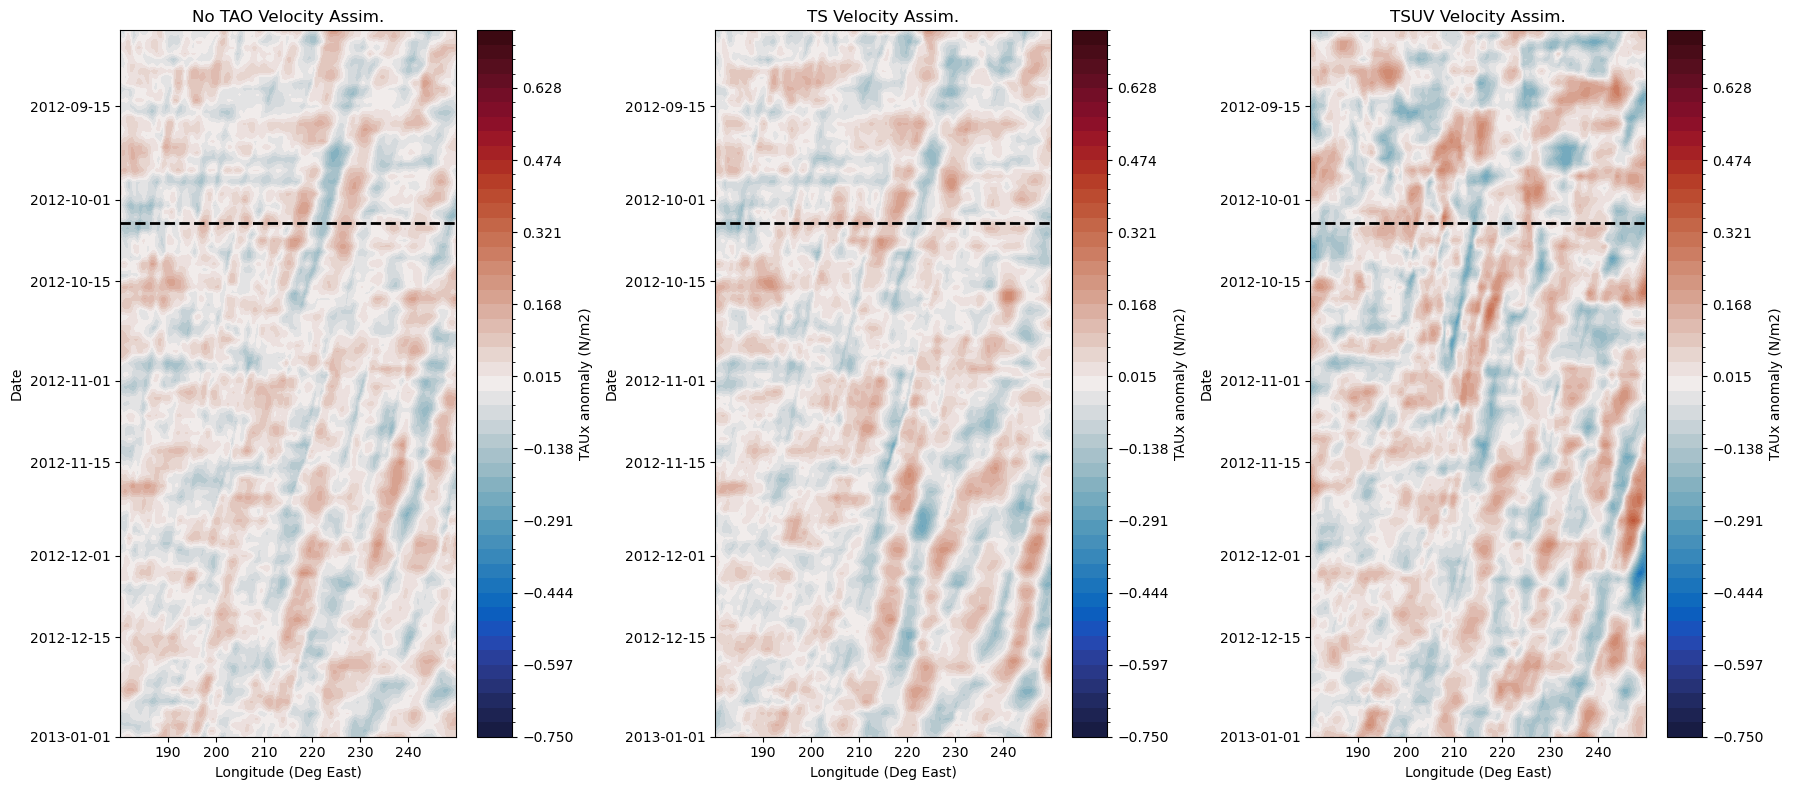

In [62]:
fig, ax = plt.subplots(figsize=(18,8), ncols=3)
vmin = -0.75
vmax = 0.75
levels = np.linspace(vmin,vmax,50)
vvel_noTAO.plot.contourf(levels=levels,vmin=vmin,vmax=vmax,ax=ax[0],x='XC',cmap=cmo.balance,cbar_kwargs={'label':'TAUx anomaly (N/m2)'})
ax[0].axhline(y=np.datetime64('2012-10-05'),color='k',linestyle='--',linewidth=2)
ax[0].set_xlabel('Longitude (Deg East)')
ax[0].set_ylabel('Date')
ax[0].set_title('No TAO Velocity Assim.')
ax[0].invert_yaxis()

vvel.plot.contourf(levels=levels,vmin=vmin,vmax=vmax,ax=ax[1],x='XC',cmap=cmo.balance,cbar_kwargs={'label':'TAUx anomaly (N/m2)'})
ax[1].axhline(y=np.datetime64('2012-10-05'),color='k',linestyle='--',linewidth=2)
ax[1].set_xlabel('Longitude (Deg East)')
ax[1].set_ylabel('Date')
ax[1].set_title('TS Velocity Assim.')
ax[1].invert_yaxis()

vvel_vel.plot.contourf(levels=levels,vmin=vmin,vmax=vmax,ax=ax[2],x='XC',cmap=cmo.balance,cbar_kwargs={'label':'TAUx anomaly (N/m2)'})
ax[2].axhline(y=np.datetime64('2012-10-05'),color='k',linestyle='--',linewidth=2)
ax[2].set_xlabel('Longitude (Deg East)')
ax[2].set_ylabel('Date')
ax[2].set_title('TSUV Velocity Assim.')
ax[2].invert_yaxis()

plt.tight_layout()
image_str = 'hovmoller_vvel_anomaly_'+ str(abs(int(depth))) + 'meters.png'
plt.savefig(folder_name+image_str,format='png')

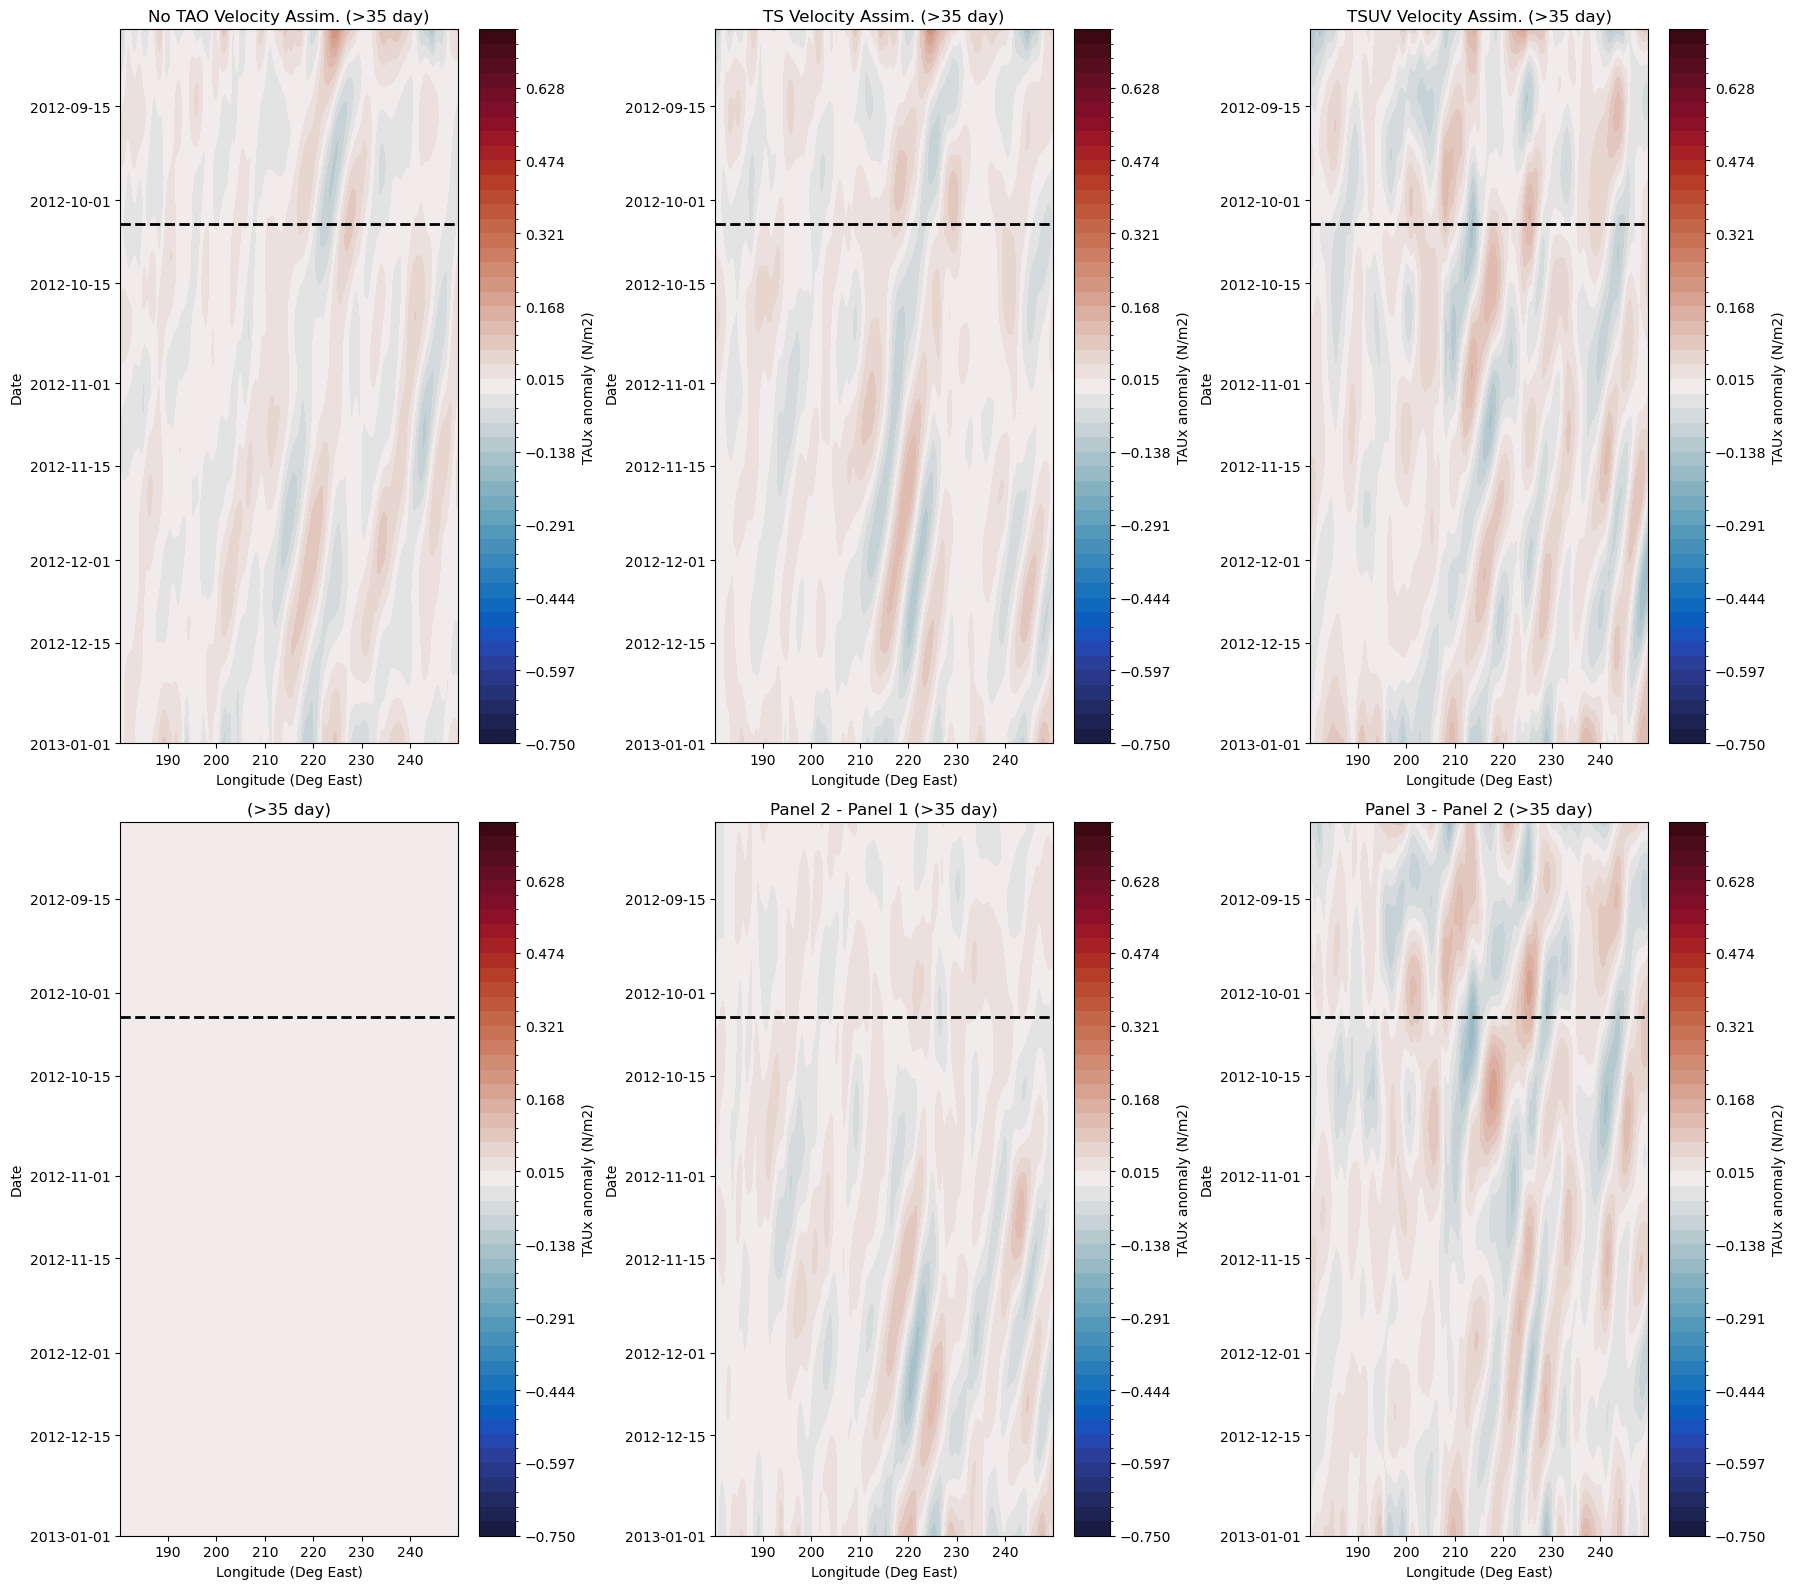

In [63]:
# filtering out high frequency changes
fs = 1/86400 # sampling rate is 1 day (86400 seconds per day)
highF = (1/35)*fs #  (1 cycle /35 days) * (1 day/86400 second)
cutoff = np.array(highF)
order = 4
sos = signal.butter(order, cutoff, 'lowpass', fs=fs, output='sos')

vvel_filt = signal.sosfiltfilt(sos, vvel, axis=0)
vvel_filt_vel = signal.sosfiltfilt(sos, vvel_vel, axis=0)
vvel_filt_noTAO = signal.sosfiltfilt(sos, vvel_noTAO, axis=0)

vvel_filt = xr.DataArray(
    vvel_filt,
    dims=('time', 'XC'),
    coords={'time': VVEL.time, 'XC': VVEL.XC},
    name='Z20'
)

vvel_filt_vel = xr.DataArray(
    vvel_filt_vel,
    dims=('time', 'XC'),
    coords={'time': VVEL.time, 'XC': VVEL.XC},
    name='Z20'
)

vvel_filt_noTAO = xr.DataArray(
    vvel_filt_noTAO,
    dims=('time', 'XC'),
    coords={'time': VVEL.time, 'XC': VVEL.XC},
    name='Z20'
)

fig, ax = plt.subplots(figsize=(18,16), ncols=3,nrows=2)

vmin = -0.75
vmax = 0.75
levels = np.linspace(vmin,vmax,50)
vvel_filt_noTAO.plot.contourf(levels=levels,vmin=vmin,vmax=vmax,ax=ax[0,0],x='XC',cmap=cmo.balance,cbar_kwargs={'label':'TAUx anomaly (N/m2)'})
ax[0,0].axhline(y=np.datetime64('2012-10-05'),color='k',linestyle='--',linewidth=2)
ax[0,0].set_xlabel('Longitude (Deg East)')
ax[0,0].set_ylabel('Date')
ax[0,0].set_title('No TAO Velocity Assim. (>35 day)')
ax[0,0].invert_yaxis()

vvel_filt.plot.contourf(levels=levels,vmin=vmin,vmax=vmax,ax=ax[0,1],x='XC',cmap=cmo.balance,cbar_kwargs={'label':'TAUx anomaly (N/m2)'})
ax[0,1].axhline(y=np.datetime64('2012-10-05'),color='k',linestyle='--',linewidth=2)
ax[0,1].set_xlabel('Longitude (Deg East)')
ax[0,1].set_ylabel('Date')
ax[0,1].set_title('TS Velocity Assim. (>35 day)')
ax[0,1].invert_yaxis()

vvel_filt_vel.plot.contourf(levels=levels,vmin=vmin,vmax=vmax,ax=ax[0,2],x='XC',cmap=cmo.balance,cbar_kwargs={'label':'TAUx anomaly (N/m2)'})
ax[0,2].axhline(y=np.datetime64('2012-10-05'),color='k',linestyle='--',linewidth=2)
ax[0,2].set_xlabel('Longitude (Deg East)')
ax[0,2].set_ylabel('Date')
ax[0,2].set_title('TSUV Velocity Assim. (>35 day)')
ax[0,2].invert_yaxis()

(vvel_filt_noTAO - vvel_filt_noTAO).plot.contourf(levels=levels,vmin=vmin,vmax=vmax,ax=ax[1,0],x='XC',cmap=cmo.balance,cbar_kwargs={'label':'TAUx anomaly (N/m2)'})
ax[1,0].axhline(y=np.datetime64('2012-10-05'),color='k',linestyle='--',linewidth=2)
ax[1,0].set_xlabel('Longitude (Deg East)')
ax[1,0].set_ylabel('Date')
ax[1,0].set_title('(>35 day)')
ax[1,0].invert_yaxis()

(vvel_filt - vvel_filt_noTAO).plot.contourf(levels=levels,vmin=vmin,vmax=vmax,ax=ax[1,1],x='XC',cmap=cmo.balance,cbar_kwargs={'label':'TAUx anomaly (N/m2)'})
ax[1,1].axhline(y=np.datetime64('2012-10-05'),color='k',linestyle='--',linewidth=2)
ax[1,1].set_xlabel('Longitude (Deg East)')
ax[1,1].set_ylabel('Date')
ax[1,1].set_title('Panel 2 - Panel 1 (>35 day)')
ax[1,1].invert_yaxis()

(vvel_filt_vel - vvel_filt).plot.contourf(levels=levels,vmin=vmin,vmax=vmax,ax=ax[1,2],x='XC',cmap=cmo.balance,cbar_kwargs={'label':'TAUx anomaly (N/m2)'})
ax[1,2].axhline(y=np.datetime64('2012-10-05'),color='k',linestyle='--',linewidth=2)
ax[1,2].set_xlabel('Longitude (Deg East)')
ax[1,2].set_ylabel('Date')
ax[1,2].set_title('Panel 3 - Panel 2 (>35 day)')
ax[1,2].invert_yaxis()

plt.tight_layout()
image_str = 'hovmoller_vvel_lowPass_'+ str(abs(int(depth))) + 'meters.png'
plt.savefig(folder_name+image_str,format='png')


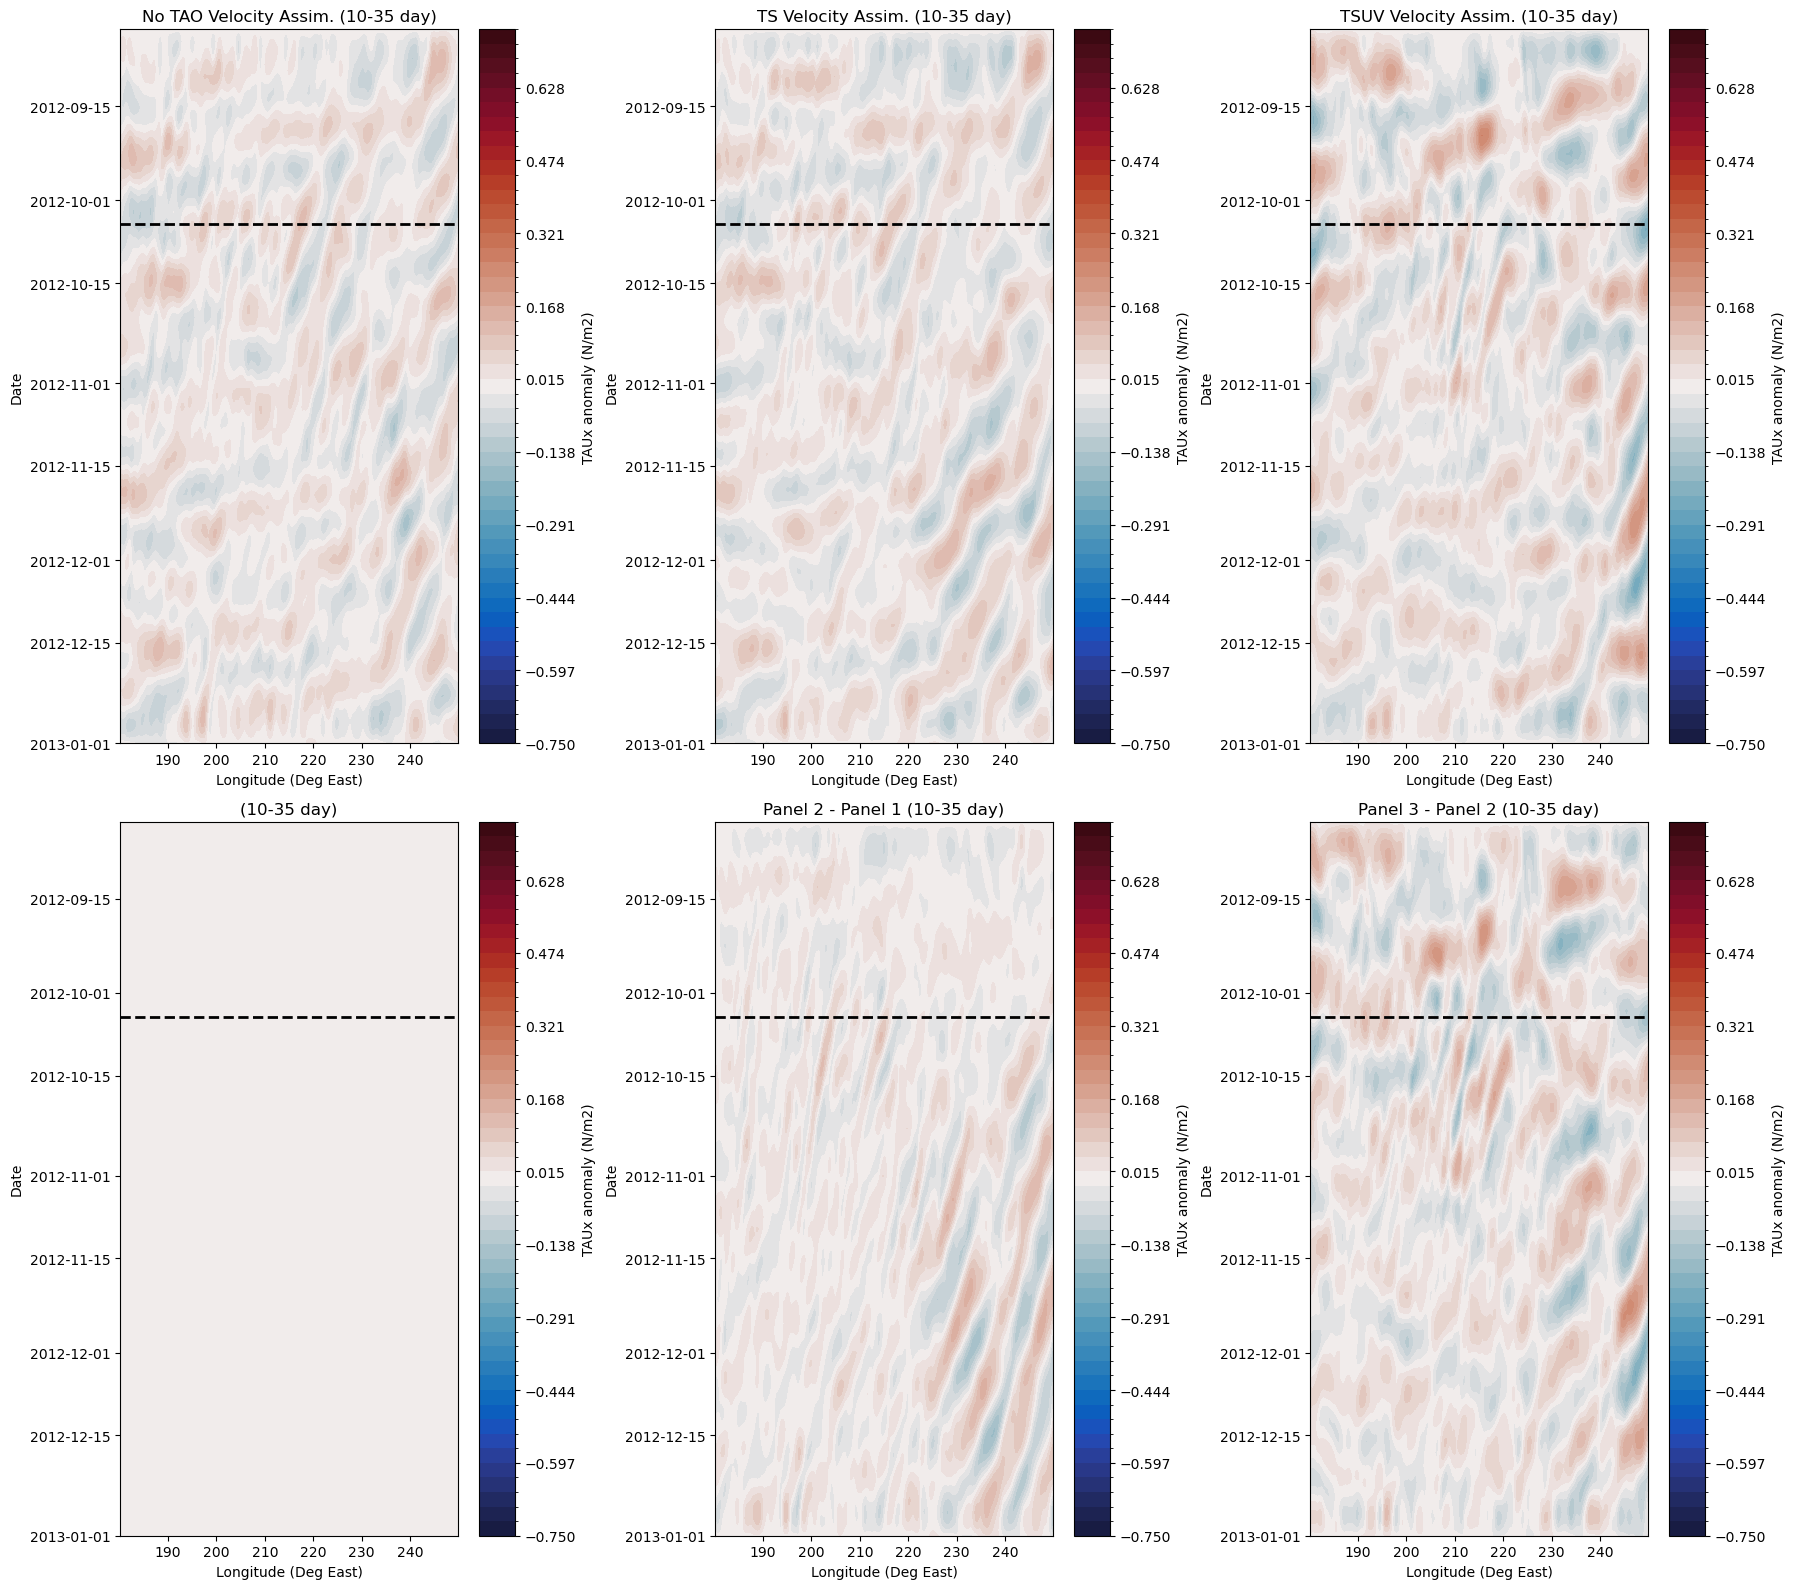

In [64]:
fs = 1/86400 # sampling rate is 1 day (86400 seconds per day)
lowF = (1/35)*fs #  (1 cycle /35 days) * (1 day/86400 second)
highF = (1/10)*fs #  (1 cycle /35 days) * (1 day/86400 second)
cutoff = np.array(highF)
order = 4
sos = signal.butter(order, [lowF, highF], 'bandpass', fs=fs, output='sos')

vvel_filt = signal.sosfiltfilt(sos, vvel, axis=0)
vvel_filt_vel = signal.sosfiltfilt(sos, vvel_vel, axis=0)
vvel_filt_noTAO = signal.sosfiltfilt(sos, vvel_noTAO, axis=0)

vvel_filt = xr.DataArray(
    vvel_filt,
    dims=('time', 'XC'),
    coords={'time': VVEL.time, 'XC': VVEL.XC},
    name='Z20'
)

vvel_filt_vel = xr.DataArray(
    vvel_filt_vel,
    dims=('time', 'XC'),
    coords={'time': VVEL.time, 'XC': VVEL.XC},
    name='Z20'
)

vvel_filt_noTAO = xr.DataArray(
    vvel_filt_noTAO,
    dims=('time', 'XC'),
    coords={'time': VVEL.time, 'XC': VVEL.XC},
    name='Z20'
)

fig, ax = plt.subplots(figsize=(18,16), ncols=3,nrows=2)

vmin = -0.75
vmax = 0.75
levels = np.linspace(vmin,vmax,50)
vvel_filt_noTAO.plot.contourf(levels=levels,vmin=vmin,vmax=vmax,ax=ax[0,0],x='XC',cmap=cmo.balance,cbar_kwargs={'label':'TAUx anomaly (N/m2)'})
ax[0,0].axhline(y=np.datetime64('2012-10-05'),color='k',linestyle='--',linewidth=2)
ax[0,0].set_xlabel('Longitude (Deg East)')
ax[0,0].set_ylabel('Date')
ax[0,0].set_title('No TAO Velocity Assim. (10-35 day)')
ax[0,0].invert_yaxis()

vvel_filt.plot.contourf(levels=levels,vmin=vmin,vmax=vmax,ax=ax[0,1],x='XC',cmap=cmo.balance,cbar_kwargs={'label':'TAUx anomaly (N/m2)'})
ax[0,1].axhline(y=np.datetime64('2012-10-05'),color='k',linestyle='--',linewidth=2)
ax[0,1].set_xlabel('Longitude (Deg East)')
ax[0,1].set_ylabel('Date')
ax[0,1].set_title('TS Velocity Assim. (10-35 day)')
ax[0,1].invert_yaxis()

vvel_filt_vel.plot.contourf(levels=levels,vmin=vmin,vmax=vmax,ax=ax[0,2],x='XC',cmap=cmo.balance,cbar_kwargs={'label':'TAUx anomaly (N/m2)'})
ax[0,2].axhline(y=np.datetime64('2012-10-05'),color='k',linestyle='--',linewidth=2)
ax[0,2].set_xlabel('Longitude (Deg East)')
ax[0,2].set_ylabel('Date')
ax[0,2].set_title('TSUV Velocity Assim. (10-35 day)')
ax[0,2].invert_yaxis()

(vvel_filt_noTAO - vvel_filt_noTAO).plot.contourf(levels=levels,vmin=vmin,vmax=vmax,ax=ax[1,0],x='XC',cmap=cmo.balance,cbar_kwargs={'label':'TAUx anomaly (N/m2)'})
ax[1,0].axhline(y=np.datetime64('2012-10-05'),color='k',linestyle='--',linewidth=2)
ax[1,0].set_xlabel('Longitude (Deg East)')
ax[1,0].set_ylabel('Date')
ax[1,0].set_title('(10-35 day)')
ax[1,0].invert_yaxis()

(vvel_filt - vvel_filt_noTAO).plot.contourf(levels=levels,vmin=vmin,vmax=vmax,ax=ax[1,1],x='XC',cmap=cmo.balance,cbar_kwargs={'label':'TAUx anomaly (N/m2)'})
ax[1,1].axhline(y=np.datetime64('2012-10-05'),color='k',linestyle='--',linewidth=2)
ax[1,1].set_xlabel('Longitude (Deg East)')
ax[1,1].set_ylabel('Date')
ax[1,1].set_title('Panel 2 - Panel 1 (10-35 day)')
ax[1,1].invert_yaxis()

(vvel_filt_vel - vvel_filt).plot.contourf(levels=levels,vmin=vmin,vmax=vmax,ax=ax[1,2],x='XC',cmap=cmo.balance,cbar_kwargs={'label':'TAUx anomaly (N/m2)'})
ax[1,2].axhline(y=np.datetime64('2012-10-05'),color='k',linestyle='--',linewidth=2)
ax[1,2].set_xlabel('Longitude (Deg East)')
ax[1,2].set_ylabel('Date')
ax[1,2].set_title('Panel 3 - Panel 2 (10-35 day)')
ax[1,2].invert_yaxis()

plt.tight_layout()
image_str = 'hovmoller_vvel_bandpass_'+ str(abs(int(depth))) + 'meters.png'
plt.savefig(folder_name+image_str,format='png')


In [ ]:
cluster.close()
client.shutdown()
client.close()